In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('preprocessed_dataframes/apartments.csv', index_col='id')

In [3]:
df.head(3)

,district,housing_type,house_type,house_build_date,floor_number,total_area,living_area,kitchen_area,nearest_subway,subway_type,subway_time,price
id,,,,,,,,,,,,
244751183,СЗАО,Новостройка,Монолитный,2023,3,23.1,8.2,5.6,Шелепиха,on foot,7,12183634
250364684,ЦАО,Новостройка,Панельный,2022,4,35.7,20.0,8.1,Китай-город,on foot,2,35730000
240745065,ЦАО,Новостройка,Панельный,2018,8,43.2,22.3,9.8,Третьяковская,on foot,9,39687365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 244751183 to 258430695
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          8997 non-null   object 
 1   housing_type      8997 non-null   object 
 2   house_type        8997 non-null   object 
 3   house_build_date  8997 non-null   int64  
 4   floor_number      8997 non-null   int64  
 5   total_area        8997 non-null   float64
 6   living_area       8997 non-null   float64
 7   kitchen_area      8997 non-null   float64
 8   nearest_subway    8997 non-null   object 
 9   subway_type       8997 non-null   object 
 10  subway_time       8997 non-null   int64  
 11  price             8997 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 913.8+ KB


In [5]:
df.describe()

,house_build_date,floor_number,total_area,living_area,kitchen_area,subway_time,price
count,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8.997000e+03
mean,2007.887407,10.238302,110.447547,63.765522,18.889763,8.670779,6.282502e+07
std,23.543483,9.816101,82.969081,54.185546,13.040676,5.394516,1.120796e+08
min,1830.000000,1.000000,9.700000,5.900000,1.000000,0.000000,2.944900e+06
25%,2002.000000,3.000000,60.000000,32.000000,10.500000,5.000000,1.499850e+07
50%,2019.000000,7.000000,86.500000,48.800000,16.000000,8.000000,2.850000e+07
75%,2022.000000,14.000000,137.600000,80.000000,22.800000,12.000000,6.800000e+07
max,2026.000000,95.000000,2180.900000,1519.000000,332.000000,59.000000,3.153600e+09


In [6]:
df.describe(include=object)

,district,housing_type,house_type,nearest_subway,subway_type
count,8997,8997,8997,8997,8997
unique,12,2,8,276,2
top,ЦАО,Вторичка,Монолитный,Шелепиха,on foot
freq,2285,4553,4088,213,6691


In [7]:
df.district.value_counts()

ЦАО               2285
ЗАО               1702
НАО               1010
САО                825
СЗАО               730
ЮВАО               631
ЮАО                575
СВАО               548
ЮЗАО               419
ВАО                260
ЗелАО                6
ТАО (Троицкий)       6
Name: district, dtype: int64

In [8]:
big_districts = df.district.value_counts()[df.district.value_counts() > 100].index
df.district = df.district.apply(lambda x: x if x in big_districts else "another")

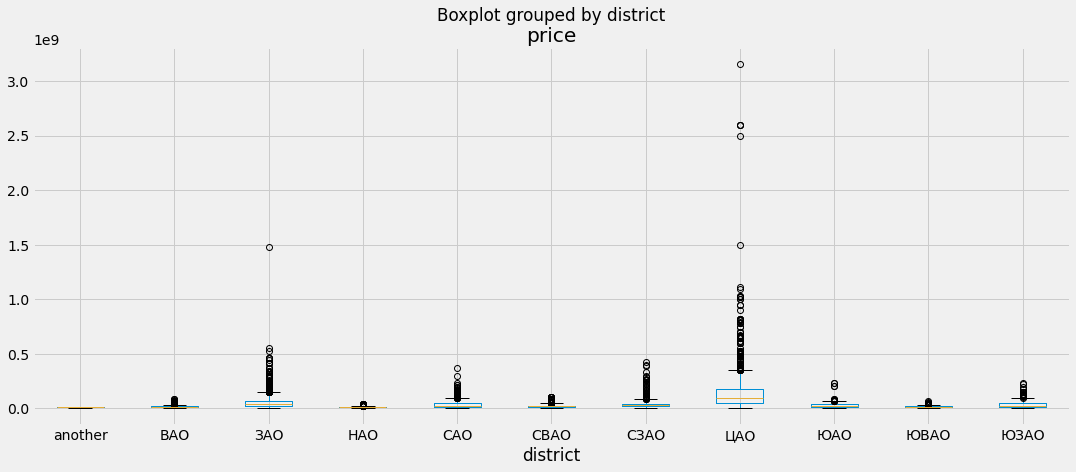

In [9]:
df.boxplot(column='price', by='district', figsize=(18, 7));

In [10]:
df['log_price'] = df.price.apply(np.log1p)

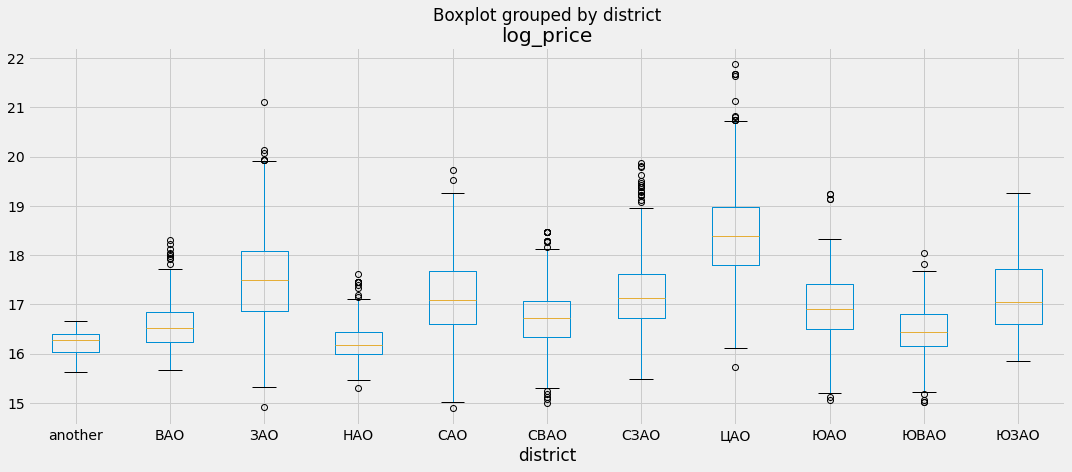

In [11]:
df.boxplot(column='log_price', by='district', figsize=(18, 7));

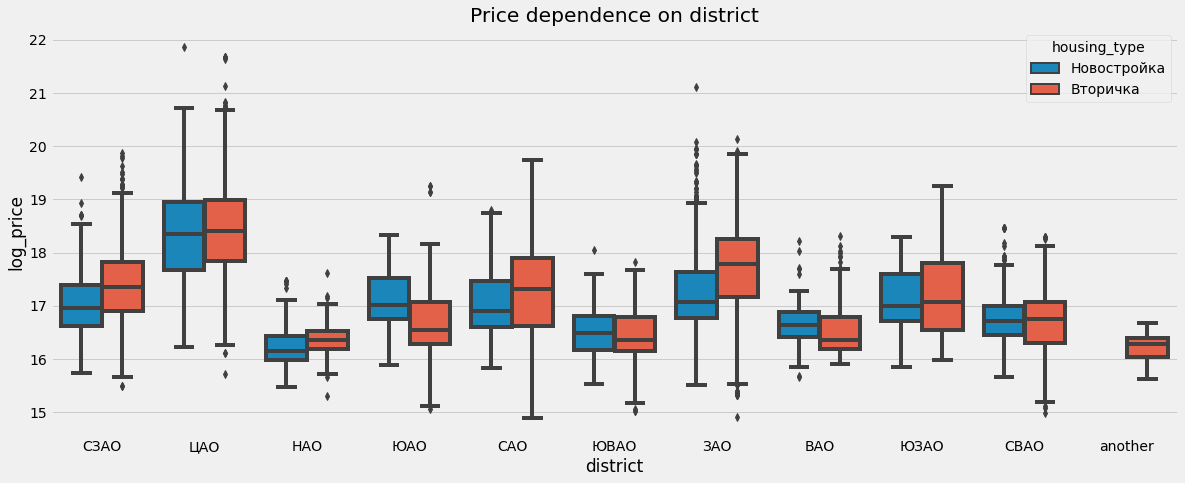

In [12]:
plt.figure(figsize=(18, 7))
sns.boxplot(x='district', y='log_price', hue='housing_type', data=df);
plt.title('Price dependence on district');

In [13]:
df.housing_type.value_counts()

Вторичка       4553
Новостройка    4444
Name: housing_type, dtype: int64

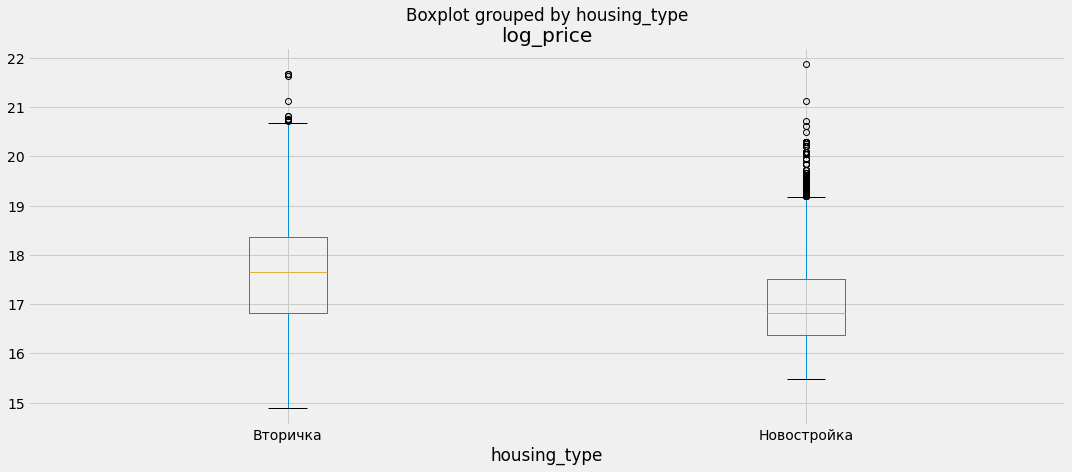

In [14]:
df.boxplot(column='log_price', by='housing_type', figsize=(18, 7));

In [15]:
df.house_type.value_counts()

Монолитный             4088
Панельный              3026
Монолитно-кирпичный     992
Кирпичный               793
Блочный                  93
Деревянный                3
Сталинский                1
Старый фонд               1
Name: house_type, dtype: int64

In [16]:
big_types = df.house_type.value_counts()[df.house_type.value_counts() > 100].index
df.house_type = df.house_type.apply(lambda x: x if x in big_types else "another")

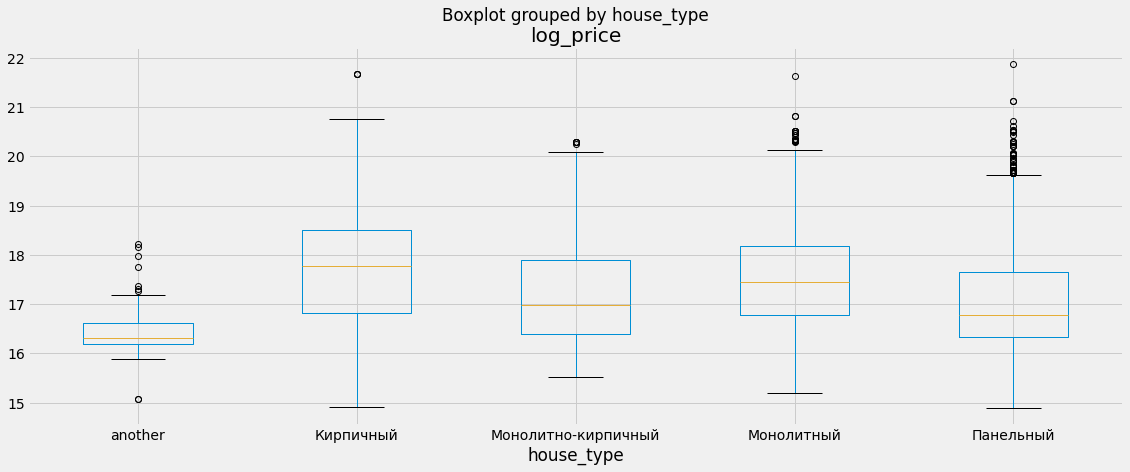

In [17]:
df.boxplot(column='log_price', by='house_type', figsize=(19, 7));

In [18]:
from data_preprocessing.preprocessing import split_on_primary_secondary

df_primary, df_secondary = split_on_primary_secondary(df)

In [19]:
dg_date = df.groupby(['house_build_date'])
dg_primary_date = df_primary.groupby(['house_build_date'])
dg_secondary_date = df_secondary.groupby(['house_build_date'])

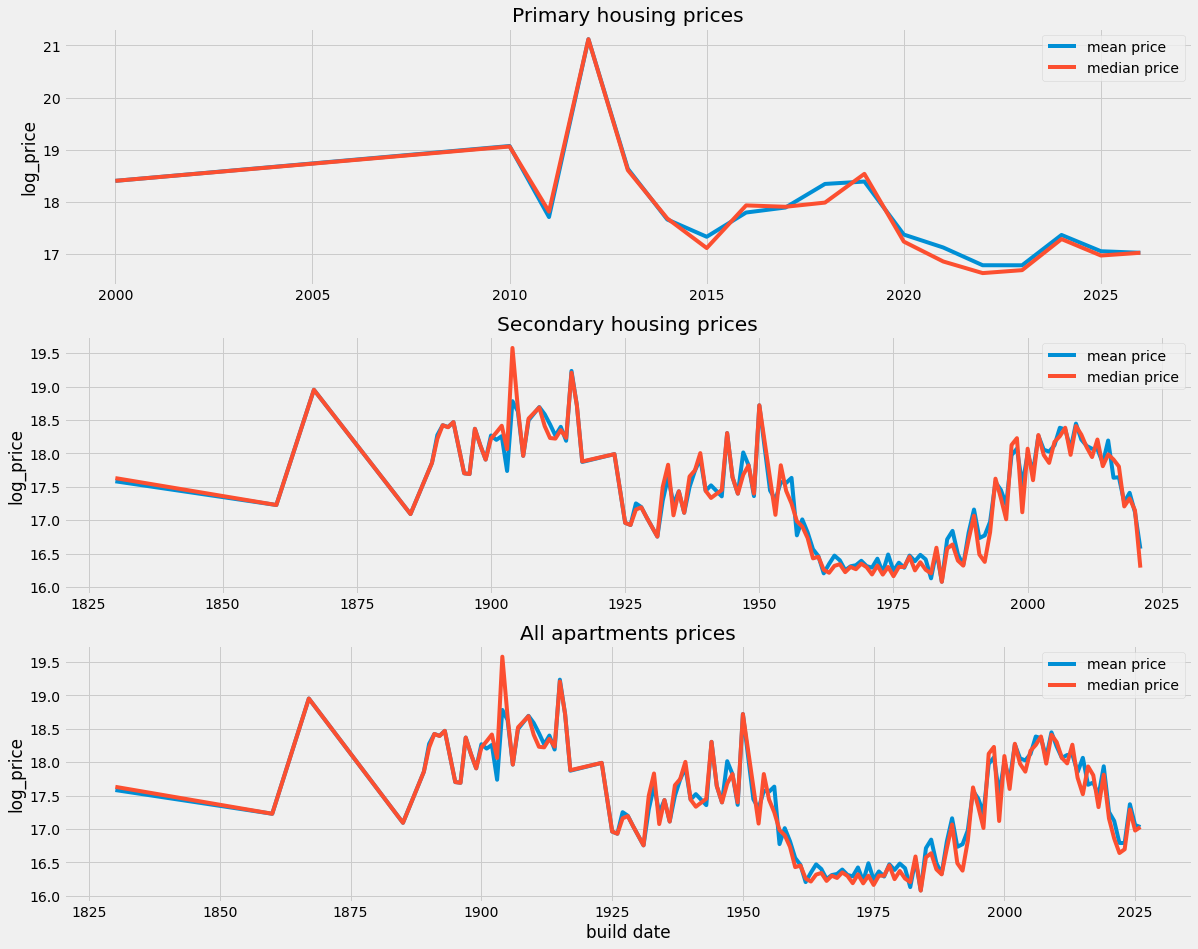

In [20]:
fig, axes = plt.subplots(3, figsize=(18,15))
axes[0].plot(dg_primary_date.log_price.mean())
axes[0].plot(dg_primary_date.log_price.median())
axes[0].set_title('Primary housing prices')
axes[0].set_ylabel('log_price')
axes[0].legend(['mean price', 'median price'], loc='upper right')

axes[1].plot(dg_secondary_date.log_price.mean())
axes[1].plot(dg_secondary_date.log_price.median())
axes[1].set_title('Secondary housing prices')
axes[1].set_ylabel('log_price')
axes[1].legend(['mean price', 'median price'], loc='upper right');

axes[2].plot(dg_date.log_price.mean())
axes[2].plot(dg_date.log_price.median())
axes[2].set_title('All apartments prices')
axes[2].set_ylabel('log_price')
axes[2].set_xlabel('build date')
axes[2].legend(['mean price', 'median price'], loc='upper right');

In [21]:
dg_primary_date[['log_price']].count()

,log_price
house_build_date,
2000,1
2010,6
2011,18
2012,1
2013,14
2014,3
2015,27
2016,14
2017,59


In [22]:
primary_years = dg_primary_date.log_price.count()[dg_primary_date.log_price.count() > 100].index
df_primary_years = df_primary[df_primary.house_build_date.isin(primary_years)]
dg_primary_years_date = df_primary_years.groupby(['house_build_date'])
primary_years

Int64Index([2019, 2020, 2021, 2022, 2023, 2024], dtype='int64', name='house_build_date')

In [23]:
secondary_years = dg_secondary_date.log_price.count()[dg_secondary_date.log_price.count() > 50].index
df_secondary_years = df_secondary[df_secondary.house_build_date.isin(secondary_years)]
dg_secondary_years_date = df_secondary_years.groupby(['house_build_date'])
secondary_years

Int64Index([1994, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='house_build_date')

In [24]:
years = dg_date.log_price.count()[dg_date.log_price.count() > 50].index
df_years = df[df.house_build_date.isin(years)]
dg_years_date = df_years.groupby(['house_build_date'])
years

Int64Index([1994, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
            2022, 2023, 2024],
           dtype='int64', name='house_build_date')

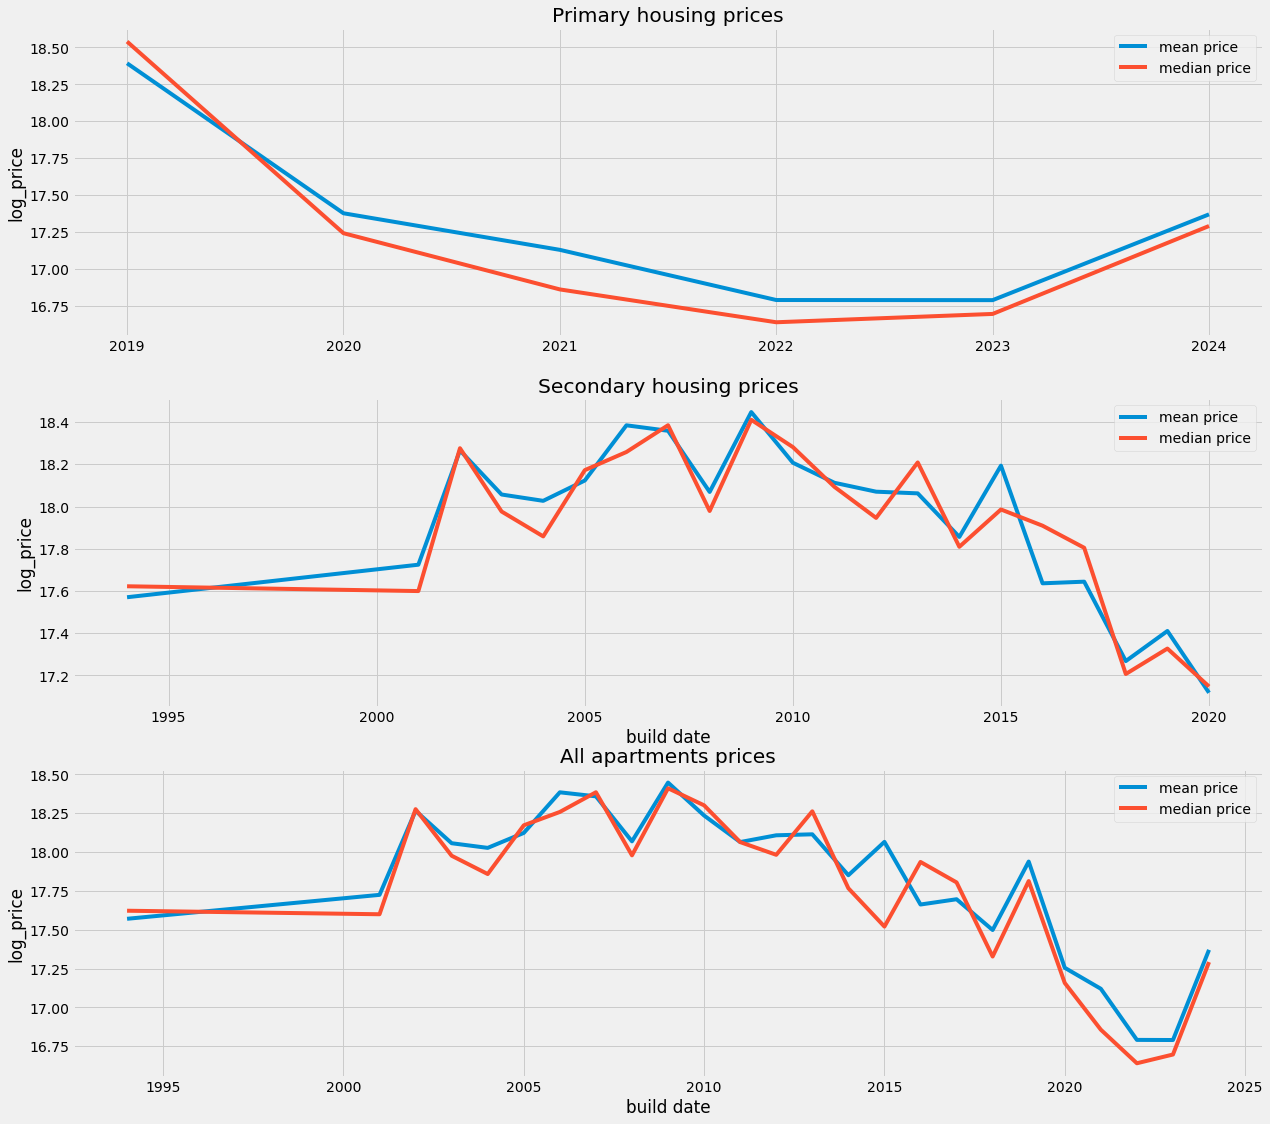

In [25]:
fig, axes = plt.subplots(3, figsize=(19,18))
axes[0].plot(dg_primary_years_date.log_price.mean())
axes[0].plot(dg_primary_years_date.log_price.median())
axes[0].set_title('Primary housing prices')
axes[0].set_ylabel('log_price')
axes[0].legend(['mean price', 'median price'], loc='upper right')

axes[1].plot(dg_secondary_years_date.log_price.mean())
axes[1].plot(dg_secondary_years_date.log_price.median())
axes[1].set_title('Secondary housing prices')
axes[1].set_ylabel('log_price')
axes[1].set_xlabel('build date')
axes[1].legend(['mean price', 'median price'], loc='upper right');

axes[2].plot(dg_years_date.log_price.mean())
axes[2].plot(dg_years_date.log_price.median())
axes[2].set_title('All apartments prices')
axes[2].set_ylabel('log_price')
axes[2].set_xlabel('build date')
axes[2].legend(['mean price', 'median price'], loc='upper right');

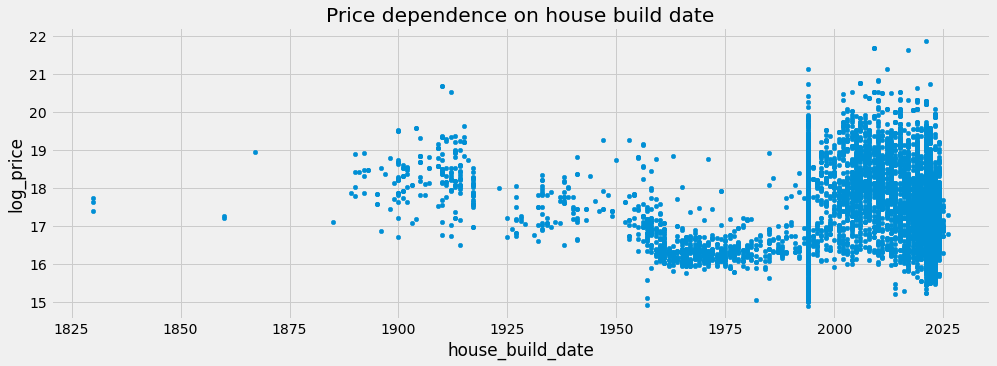

In [26]:
df.plot.scatter(x='house_build_date', y='log_price', figsize=(15,5));
plt.title('Price dependence on house build date');

In [27]:
dg_floor = df.groupby(['floor_number'])
dg_primary_floor = df_primary.groupby(['floor_number'])
dg_secondary_floor = df_secondary.groupby(['floor_number'])

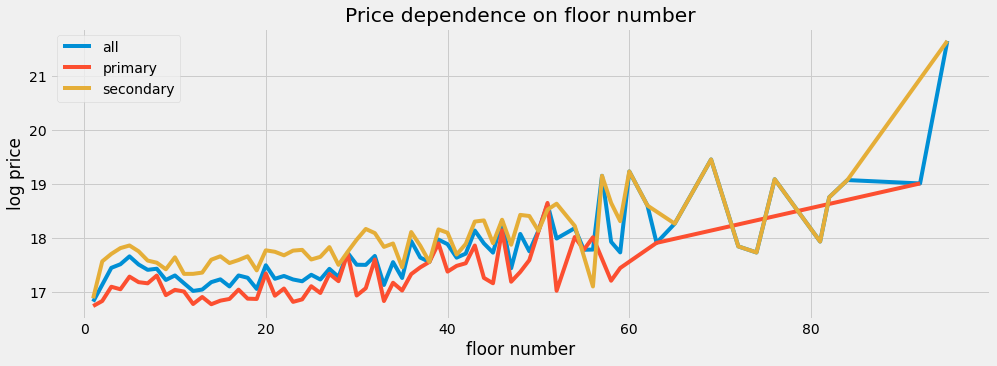

In [28]:
dg_floor.log_price.mean().plot(figsize=(15,5))
dg_primary_floor.log_price.mean().plot()
dg_secondary_floor.log_price.mean().plot()
plt.title('Price dependence on floor number')
plt.xlabel('floor number')
plt.ylabel('log price')
plt.legend(['all', 'primary', 'secondary']);

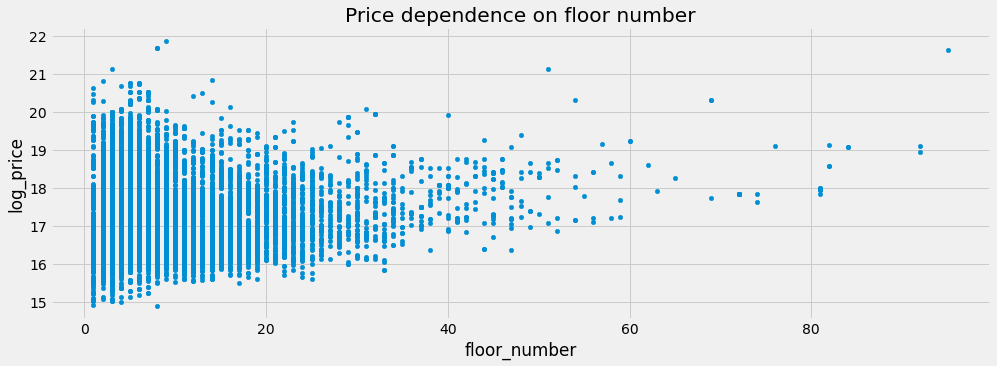

In [29]:
df.plot.scatter(x='floor_number', y='log_price', figsize=(15,5))
plt.title('Price dependence on floor number');

In [30]:
floors = dg_floor.log_price.count()[dg_floor.log_price.count() > 50].index
df_floor = df[df.floor_number.isin(floors)]
dg_big_floors = df_floor.groupby(['floor_number'])
floors

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 28],
           dtype='int64', name='floor_number')

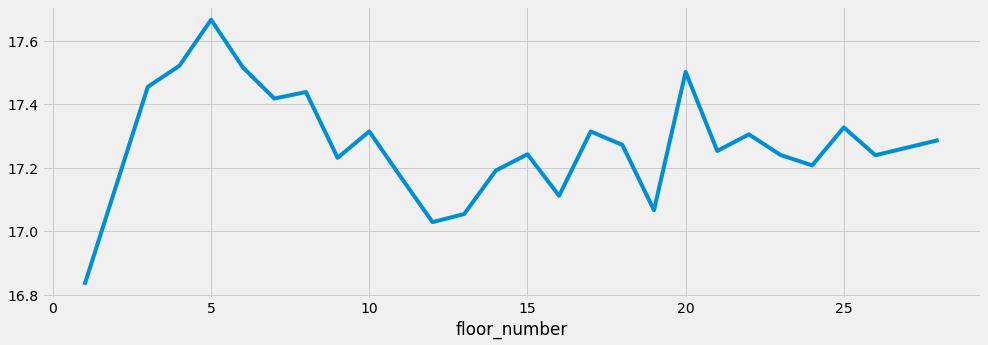

In [31]:
dg_big_floors.log_price.mean().plot(figsize=(15,5));

In [32]:
df_area = df[df.total_area < df.total_area.quantile(0.95)]

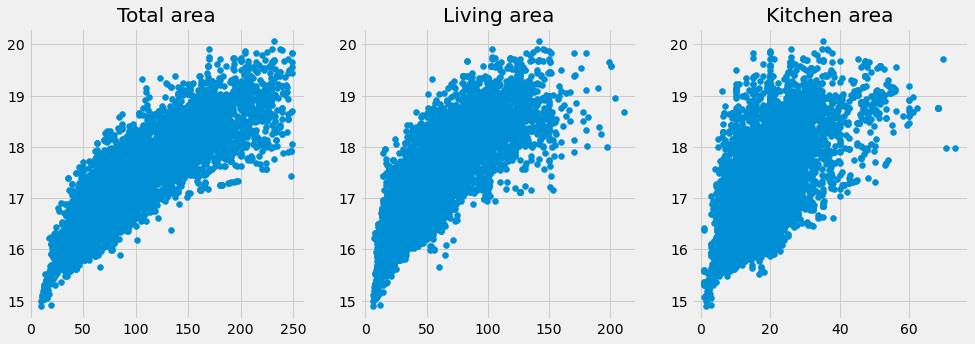

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].scatter(df_area.total_area, df_area.log_price)
axes[0].set_title('Total area')

axes[1].scatter(df_area.living_area, df_area.log_price)
axes[1].set_title('Living area')

axes[2].scatter(df_area.kitchen_area, df_area.log_price);
axes[2].set_title('Kitchen area');

In [34]:
df.nearest_subway.value_counts()

Шелепиха                 213
Фрунзенская              212
Минская                  207
Прокшино                 163
Ольховая                 162
                        ... 
Петровско-Разумовская      1
Бескудниково               1
Кубанская                  1
Александровский сад        1
Красный Балтиец            1
Name: nearest_subway, Length: 276, dtype: int64

In [35]:
big_subways = df.nearest_subway.value_counts()[df.nearest_subway.value_counts() > 100].index
df['nearest_subway2'] = df.nearest_subway.apply(lambda x: x if x in big_subways else "another")
big_subways, len(big_subways)

(Index(['Шелепиха', 'Фрунзенская', 'Минская', 'Прокшино', 'Ольховая',
        'Рассказовка', 'Раменки', 'Арбатская', 'Кропоткинская', 'Деловой центр',
        'Кунцевская', 'Улица 1905 года', 'Смоленская', 'Выставочная',
        'Аэропорт', 'Филатов Луг', 'Аминьевское шоссе', 'Спортивная', 'Фили'],
       dtype='object'),
 19)

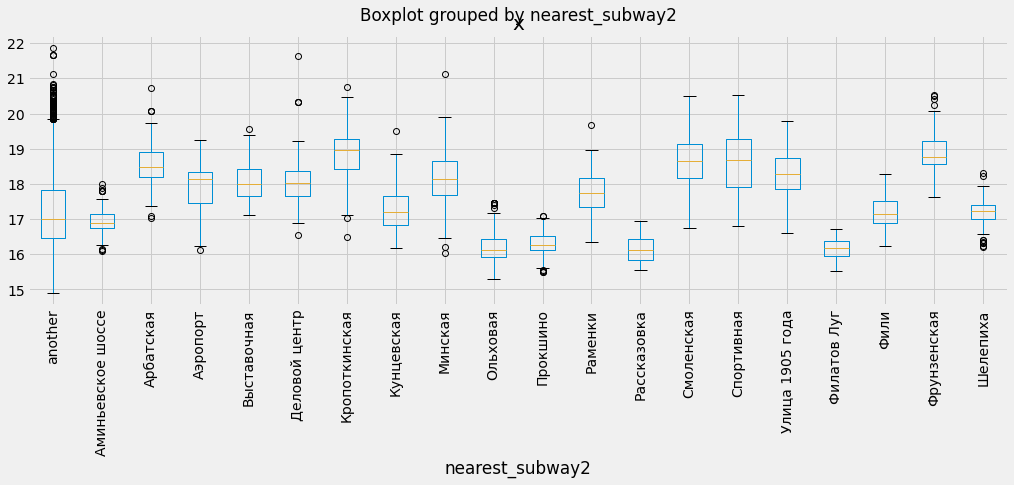

In [36]:
df.boxplot(column='log_price', by='nearest_subway2', figsize=(17,5));
plt.title('x');
plt.xticks(rotation=90);

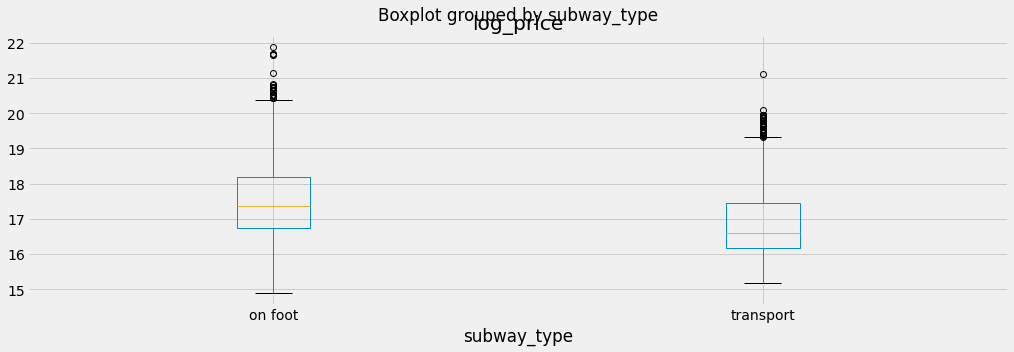

In [37]:
df.boxplot(column='log_price', by='subway_type', figsize=(17,5));

In [38]:
df_on_foot = df[df.subway_type == 'on foot']
dg_on_foot = df_on_foot.groupby('subway_time')

df_transport = df[df.subway_type == 'transport']
dg_transport = df_transport.groupby('subway_time')

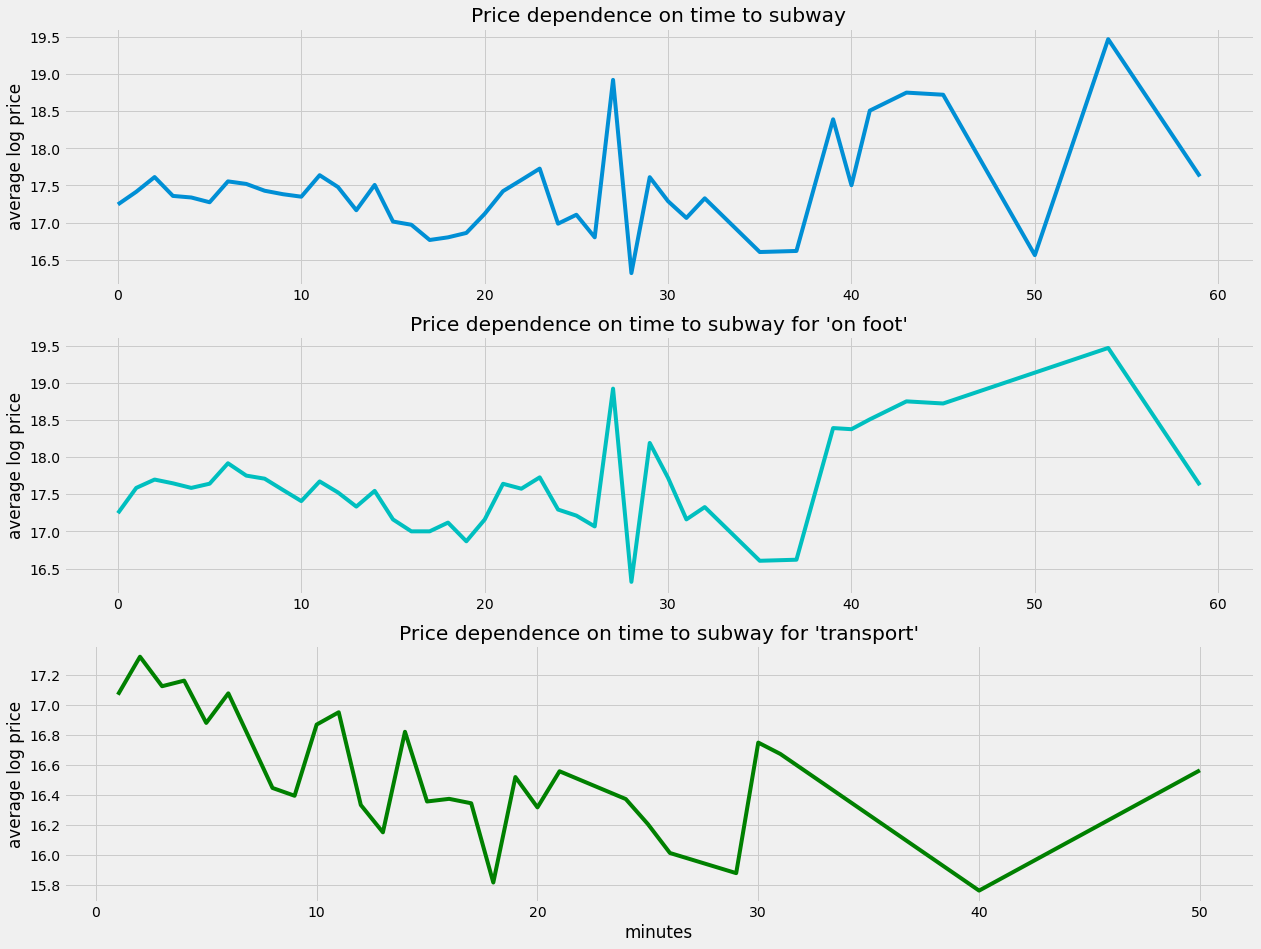

In [39]:
fig, axes = plt.subplots(3, figsize=(19,15))

axes[0].plot(df.groupby('subway_time')['log_price'].mean());
axes[0].set_title('Price dependence on time to subway');
axes[0].set_ylabel('average log price');

axes[1].plot(df_on_foot.groupby('subway_time')['log_price'].mean(), color='c');
axes[1].set_title("Price dependence on time to subway for 'on foot'");
axes[1].set_ylabel('average log price');

axes[2].plot(df_transport.groupby('subway_time')['log_price'].mean(), color='green');
axes[2].set_title("Price dependence on time to subway for 'transport'");
axes[2].set_ylabel('average log price');
axes[2].set_xlabel('minutes');

In [40]:
def get_subway_time(x):
    if 0 <= x < 5:
        return '0-5'
    elif x < 10:
        return '5-10'
    elif x < 15:
        return '10-15'
    else:
        return '15+'

def get_subway_summary(df):
    subway_type = df.subway_type.apply(lambda x: 'f' if x == 'on foot' else 't')
    subway_time = df.subway_time.apply(get_subway_time)
    return pd.Series(subway_type + ':' + subway_time, name='subway_summary')

In [41]:
df['subway_summary'] = get_subway_summary(df)

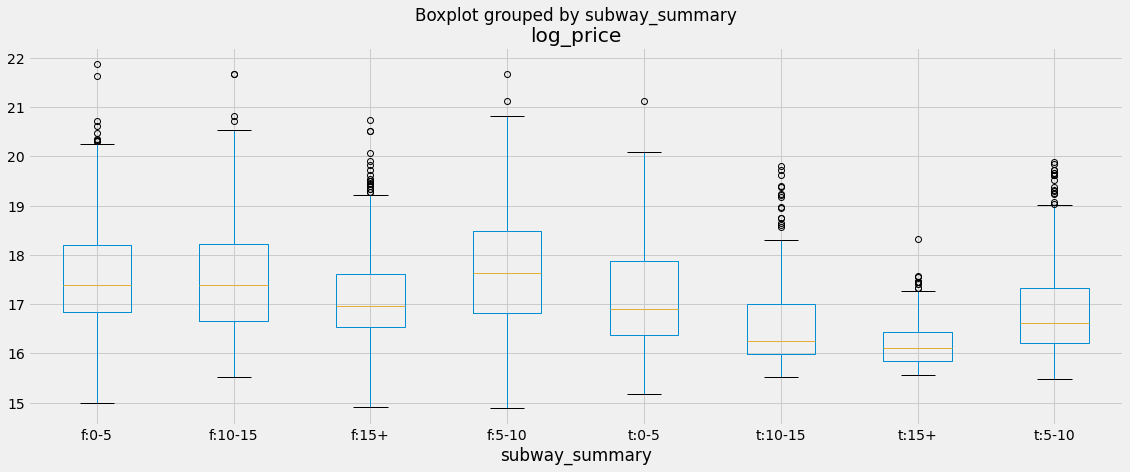

In [42]:
df.boxplot(column='log_price', by='subway_summary', figsize=(19, 7));

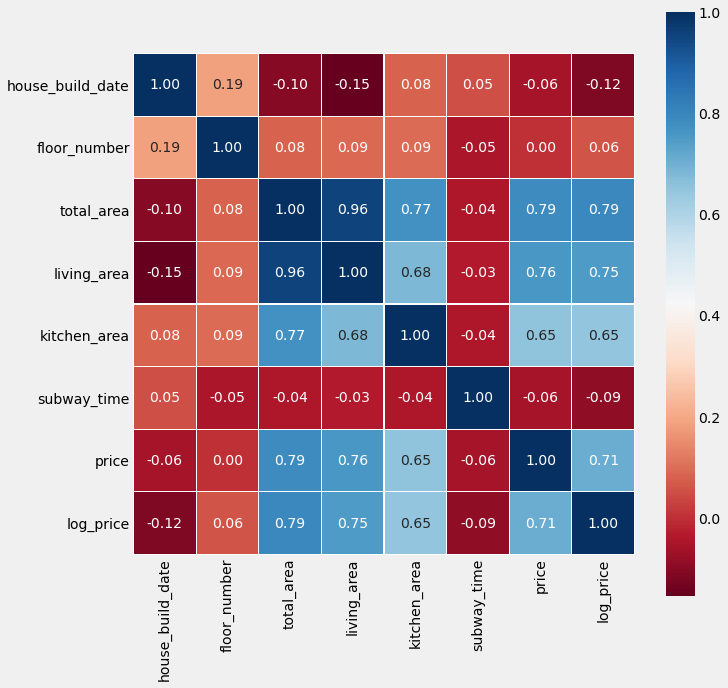

In [43]:
plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr( ), square=True,
            annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu");

In [44]:
def get_district_feature(df, threshold):
    big_districts = df.district.value_counts()[df.district.value_counts() > threshold].index
    ds_district = df.district.apply(lambda x: x if x in big_districts else "another")
    return ds_district

In [45]:
def get_house_type_feature(df, threshold):
    big_types = df.house_type.value_counts()[df.house_type.value_counts() > threshold].index
    ds_house_type = df.house_type.apply(lambda x: x if x in big_types else "another")
    return ds_house_type

In [46]:
def create_features_and_target1(df):
    ds_district = get_district_feature(df, 100)
    ds_house_type = get_house_type_feature(df, 100)
    ds_subway_summary = get_subway_summary(df)
    
    X = pd.concat(
        [
            ds_district,
            df.housing_type,
            ds_house_type,
            df.total_area,
            ds_subway_summary
        ],
        axis=1
    )
    X.reset_index(drop=True, inplace=True)
    return X, df.price.apply(np.log1p)

In [47]:
def create_features_and_target2(df):
    ds_district = get_district_feature(df, 100)
    ds_house_type = get_house_type_feature(df, 100)
    ds_subway_summary = get_subway_summary(df)
    ds_build_date_1995_2010 = df.house_build_date.apply(lambda x: x if (1995 <= x < 2010) else 0).rename('build_date_1995_2010')
    ds_build_date_2010_2022 = df.house_build_date.apply(lambda x: x if (2010 <= x < 2022) else 0).rename('build_date_2010_2022')
    ds_build_date_2022_plus = df.house_build_date.apply(lambda x: x if 2022 <= x else 0).rename('build_date_2022_plus')
    
    X = pd.concat(
        [
            ds_district,
            df.housing_type,
            ds_house_type,
            df.total_area,
            ds_build_date_1995_2010,
            ds_build_date_2010_2022,
            ds_build_date_2022_plus,
            ds_subway_summary
        ],
        axis=1
    )
    X.reset_index(drop=True, inplace=True)
    return X, df.price.apply(np.log1p)

In [48]:
def create_features_and_target3(df):
    ds_district = get_district_feature(df, 100)
    ds_house_type = get_house_type_feature(df, 100)
    ds_subway_summary = get_subway_summary(df)
    ds_build_date_1995_2010 = df.house_build_date.apply(lambda x: x if (1995 <= x < 2010) else 0).rename('build_date_1995_2010')
    ds_build_date_2010_2022 = df.house_build_date.apply(lambda x: x if (2010 <= x < 2022) else 0).rename('build_date_2010_2022')
    ds_build_date_2022_plus = df.house_build_date.apply(lambda x: x if 2022 <= x else 0).rename('build_date_2022_plus')
    ds_floor_number_1_5 = df.floor_number.apply(lambda x: x if x <= 5 else 0).rename('floor_number_1_5')
    ds_floor_number_5_12 = df.floor_number.apply(lambda x: x if (5 < x <= 12) else 0).rename('floor_number_5_12')
    
    X = pd.concat(
        [
            ds_district,
            df.housing_type,
            ds_house_type,
            df.total_area,
            ds_build_date_1995_2010,
            ds_build_date_2010_2022,
            ds_build_date_2022_plus,
            ds_floor_number_1_5,
            ds_floor_number_5_12,
            ds_subway_summary
        ],
        axis=1
    )
    X.reset_index(drop=True, inplace=True)
    return X, df.price.apply(np.log1p)

In [49]:
X1, y1 = create_features_and_target1(df)
X2, y2 = create_features_and_target2(df)
X3, y3 = create_features_and_target3(df)

In [50]:
X1.head(2)

,district,housing_type,house_type,total_area,subway_summary
0,СЗАО,Новостройка,Монолитный,23.1,f:5-10
1,ЦАО,Новостройка,Панельный,35.7,f:0-5


In [51]:
X2.head(2)

,district,housing_type,house_type,total_area,build_date_1995_2010,build_date_2010_2022,build_date_2022_plus,subway_summary
0,СЗАО,Новостройка,Монолитный,23.1,0,0,2023,f:5-10
1,ЦАО,Новостройка,Панельный,35.7,0,0,2022,f:0-5


In [52]:
X3.head(2)

,district,housing_type,house_type,total_area,build_date_1995_2010,build_date_2010_2022,build_date_2022_plus,floor_number_1_5,floor_number_5_12,subway_summary
0,СЗАО,Новостройка,Монолитный,23.1,0,0,2023,3,0,f:5-10
1,ЦАО,Новостройка,Панельный,35.7,0,0,2022,4,0,f:0-5


In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

In [54]:
results_table = pd.DataFrame([[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                              [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                              [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                              [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]],
                  index=pd.Index(['Optim params', 'LMSE', 'LRMSE', 'R-Squared'], name='Params and Metrics'),
                  columns=pd.MultiIndex.from_product([['Ridge', 'KNN', 'SVR'],
                                                      ['standart features',  '+ house buld date', '+ floor number']],
                                                      names=['Model:', 'Features:']))
results_table

Model:                         Ridge                                   \
Features:          standart features + house buld date + floor number   
Params and Metrics                                                      
Optim params                     NaN               NaN            NaN   
LMSE                             NaN               NaN            NaN   
LRMSE                            NaN               NaN            NaN   
R-Squared                        NaN               NaN            NaN   

Model:                           KNN                                   \
Features:          standart features + house buld date + floor number   
Params and Metrics                                                      
Optim params                     NaN               NaN            NaN   
LMSE                             NaN               NaN            NaN   
LRMSE                            NaN               NaN            NaN   
R-Squared                        NaN               NaN            NaN   

Model:                           SVR                                   
Features:          standart features + house buld date + floor number  
Params and Metrics                                                     
Optim params                     NaN               NaN            NaN  
LMSE                             NaN               NaN            NaN  
LRMSE                            NaN               NaN            NaN  
R-Squared                        NaN               NaN            NaN

In [55]:
def transform_and_split(X, y, numerical_columns, categorical_columns, test_size=0.2):
    transformer = ColumnTransformer([("StandardScaler", StandardScaler(), numerical_columns),
                                     ("One hot", OneHotEncoder(sparse=False), categorical_columns)],
                                    remainder="passthrough")

    X = transformer.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=test_size,
                                                        random_state=13)
    return X_train, X_test, y_train, y_test

In [56]:
def train_model(X_train, y_train, model, model_params):
    if model == 'Ridge':
        model = Ridge(random_state=13)
    elif model == 'KNN':
        model = KNeighborsRegressor()
    elif model == 'SVR':
        model = SVR()
    else:
        raise AttributeError("choose one of the following models: 'Ridge', 'KNN' or 'SVR'")
    
    grid_searcher = GridSearchCV(model, param_grid=model_params, cv=5)
    grid_searcher.fit(X_train, y_train)
    
    return grid_searcher

In [57]:
def evaluate_metrics(estimator, X_test, y_test):
    MSE = mean_squared_error(y_test, estimator.predict(X_test))
    RMSE = np.sqrt(MSE)
    MSE_baseline = mean_squared_error(y_test, np.full(y_test.shape, y_test.mean()))
    R2 = 1 - MSE / MSE_baseline
    return round(MSE, 6), round(RMSE, 6), round(R2, 6)

In [58]:
def get_model_with_metrics(X, y, numerical_columns, categorical_columns, model, model_params):
    X_train, X_test, y_train, y_test = transform_and_split(X, y, numerical_columns, categorical_columns)
    
    grid_searcher = train_model(X_train, y_train, model, model_params)
    
    MSE, RMSE, R2 = evaluate_metrics(grid_searcher.best_estimator_, X_test, y_test)
    
    return grid_searcher.best_estimator_, grid_searcher.best_params_, MSE, RMSE, R2

In [59]:
features_sets = {'standart features': create_features_and_target1,
                 '+ house buld date': create_features_and_target2,
                 '+ floor number': create_features_and_target3}

numerical_columns = {
    'standart features': ['total_area'],
    '+ house buld date': ['total_area', 'build_date_1995_2010', 'build_date_2010_2022', 'build_date_2022_plus'],
    '+ floor number': ['total_area', 'build_date_1995_2010', 'build_date_2010_2022',
                       'build_date_2022_plus', 'floor_number_1_5', 'floor_number_5_12']
}

categorical_columns = {
    'standart features': ['district', 'housing_type', 'house_type', 'subway_summary'],
    '+ house buld date': ['district', 'housing_type', 'house_type', 'subway_summary'],
    '+ floor number': ['district', 'housing_type', 'house_type', 'subway_summary']
}

models = ['Ridge', 'KNN', 'SVR']

model_params = {
    'Ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'KNN': {
        'n_neighbors': [3, 5, 9, 15]        
    },
    'SVR': {
        'kernel': ['linear', 'rbf'],
        'C': [0.01, 0.1, 1, 10],
        'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]
    }
}

In [60]:
from tqdm.notebook import tqdm

best_models = {}

for model in tqdm(models):
    for feature_type, create_features_func in features_sets.items():
        X, y = create_features_func(df)
        
        best_estimator, best_params, LMSE, LRMSE, R2 = get_model_with_metrics(X, y,
                                                                              numerical_columns[feature_type], 
                                                                              categorical_columns[feature_type],
                                                                              model, model_params[model])
        
        results_table.loc[:, (model, feature_type)] = [best_params, LMSE, LRMSE, R2]
        
        best_models[(model, feature_type)] = best_estimator    

  0%|          | 0/3 [00:00<?, ?it/s]

In [61]:
results_table.style.set_caption("Simulation results")

In [62]:
X1, y1 = create_features_and_target1(df)

transformer = ColumnTransformer([("StandardScaler", StandardScaler(), numerical_columns['standart features']),
                                 ("One hot", OneHotEncoder(sparse=False), categorical_columns['standart features'])],
                                 remainder="passthrough")

X1 = transformer.fit_transform(X1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,
                                                        y1,
                                                        test_size=0.2,
                                                        random_state=13)

ridge_searcher = GridSearchCV(Ridge(random_state=13), param_grid=model_params['Ridge'], cv=5)
ridge_searcher.fit(X1_train, y1_train)

feature_names = transformer.named_transformers_['One hot'].get_feature_names(categorical_columns['standart features'])
feature_names = np.concatenate([numerical_columns['standart features'], feature_names])

coefs_ridge = pd.DataFrame(
    ridge_searcher.best_estimator_.coef_,
    columns=['Coefficients'], index=feature_names
)

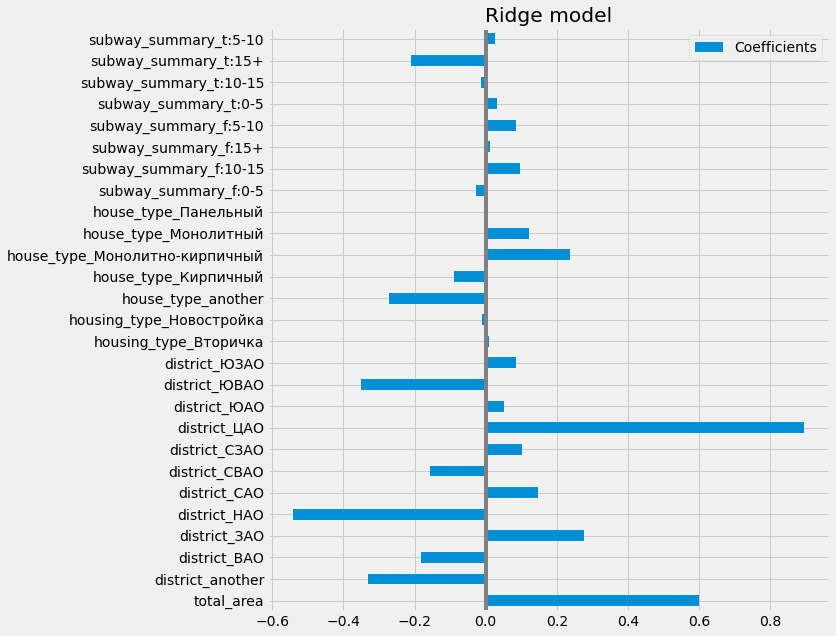

In [63]:
coefs_ridge.plot(kind='barh', figsize=(12, 10))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)